# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# Načítání a základní zobrazení dat #

## Načtení dat ##
Využiji knihovnu "pandas". Pomocí ní si načtu data ze souboru "data.csv" do proměnné "data_frame" a zobrazím si pár prvních řádek.

In [7]:
import  pandas as pd
data_frame = pd.read_csv('data.csv')
data_frame.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Zakladni zobrazeni dat ##
Nejprve si zobrazim zakladni vlastnosti priznaku, jejich datovy typ, pocet a nekolik jejich zakladni rozdeleni (prumer, pocet, ...).

In [8]:
data_frame.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

In [9]:
data_frame.describe(include='all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2718,2718.000000,2718,2718.000000,2718.000000,2718.000000,2564.000000,2718.000000,2188.000000,2718.000000,...,2700.000000,2529.000000,2700.000000,2718.000000,2317.000000,2.116000e+03,2692.000000,2692.000000,2576.000000,2576.000000
unique,183,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.113687,NaN,69.204525,164.432303,30.825239,4.672512,757.071658,80.884826,2370.999632,...,82.528148,5.943606,82.135926,1.788263,7646.459541,1.261063e+07,4.892236,4.925149,0.626697,11.996079
std,NaN,4.537979,NaN,9.612530,125.512789,121.786599,4.051664,2007.472092,25.010075,11174.241799,...,23.294376,2.488801,23.849574,5.221587,14455.594394,6.238395e+07,4.434584,4.522269,0.213323,3.364109
min,NaN,2000.000000,NaN,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,...,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,NaN,2003.000000,NaN,63.100000,73.250000,0.000000,0.990000,5.832385,77.000000,0.000000,...,77.000000,4.260000,78.000000,0.100000,459.291200,1.829220e+05,1.600000,1.600000,0.492000,10.100000
50%,NaN,2007.000000,NaN,72.200000,142.000000,3.000000,3.820000,67.687008,92.000000,18.000000,...,93.000000,5.730000,93.000000,0.100000,1741.142552,1.365022e+06,3.400000,3.400000,0.679000,12.300000
75%,NaN,2011.000000,NaN,75.800000,227.000000,22.000000,7.832500,446.887709,97.000000,372.000000,...,97.000000,7.530000,97.000000,0.800000,6337.882993,7.383590e+06,7.200000,7.300000,0.781000,14.300000


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Vizualne si prohledneme kvantitativni priznaky.

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy'}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles'}>],
       [<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'under-five deaths'}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria'}>,
        <Axes: title={'center': 'HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': 'thinness  1-19 years'}>,
        <Axes: title={'center': 'thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center': 'Schoo

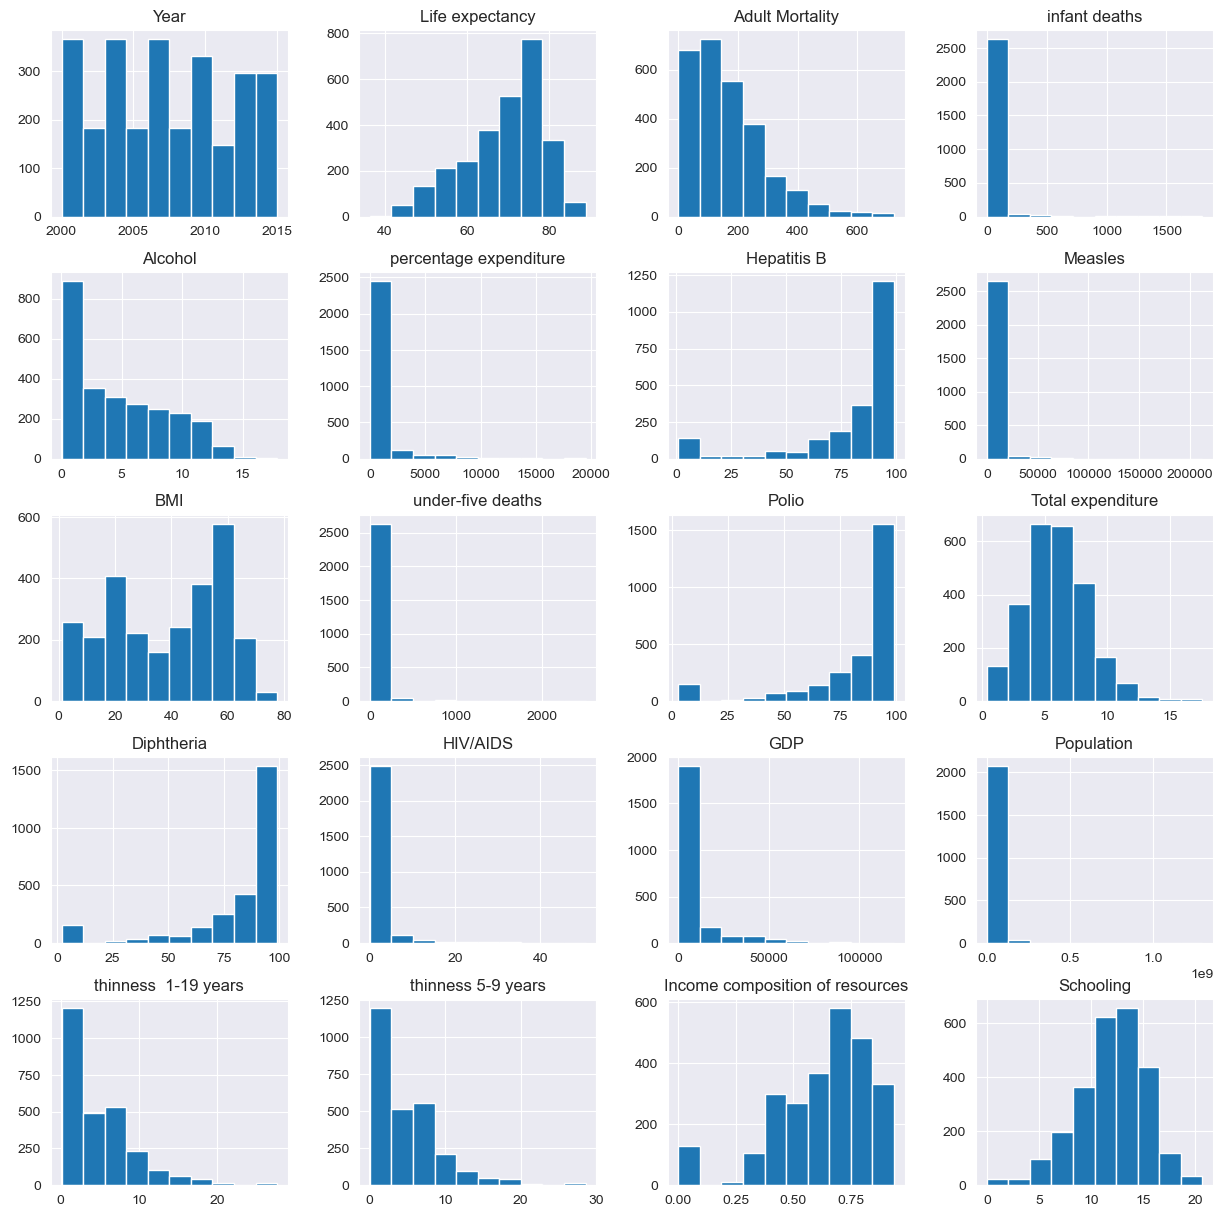

In [11]:
data_frame.hist(figsize=(15,15))

### Life Expectancy ###
Ukazeme si jake je rozdeleni "Life Expectancy" a jejich pocet.
Vidime, ze nejvice casta delka zivota je kolem 72 - 76 lety.

Text(0.5, 1.0, 'Life expectancy')

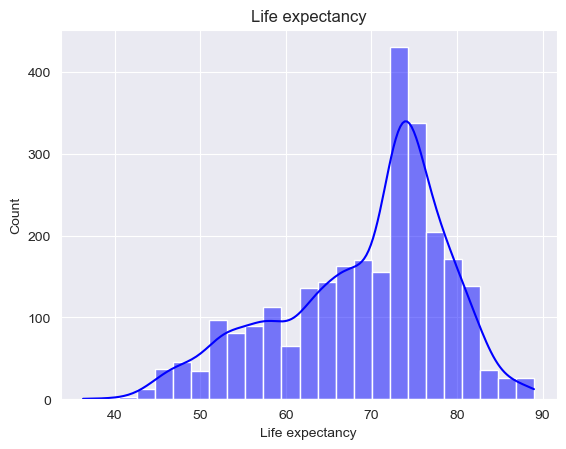

In [12]:
sns.histplot(data_frame['Life expectancy'].dropna(), kde=True, color='blue',bins=25)
plt.title('Life expectancy')

## Life expectancy a GDP ##
Ukazeme si jak zavisi Life expectancy na GDP.
Vidime,ze cim vyssi GDP tim je Life expectancy vetsi.

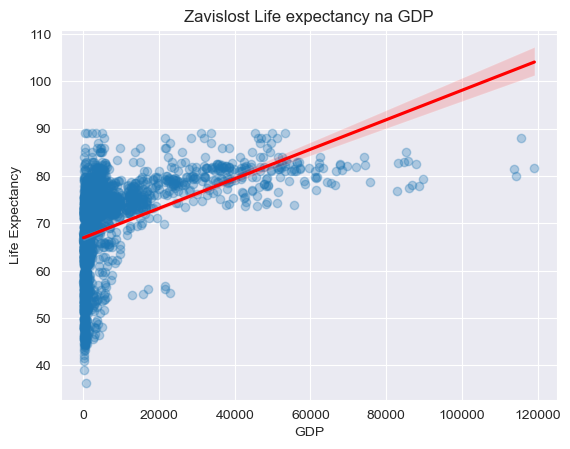

In [13]:
sns.regplot(x='GDP', y='Life expectancy', data=data_frame, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Zavislost Life expectancy na GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()

## Life expectancy a BMI ##
Podivejme se na velmi zajimavy graf.
Vypada to, ze cim vetsi BMI tim vetsi Life expectancy. Zluta znaci prechod z podvahy na normalni vahu. Zelena znaci prechod z nadvahy do obezity.
Jak si tedy vysvetlit, ze cim vetsi vetsi BMI, tim vetsi Life expectancy. Jednoduse !
Vetsinou  vysokeho BMI dosahuji lide v rozvintuych zemich, kde je dostatek penez na jidlo,
ale zaroven dostatek penez i pro lepsi zdravotnickou peci. 

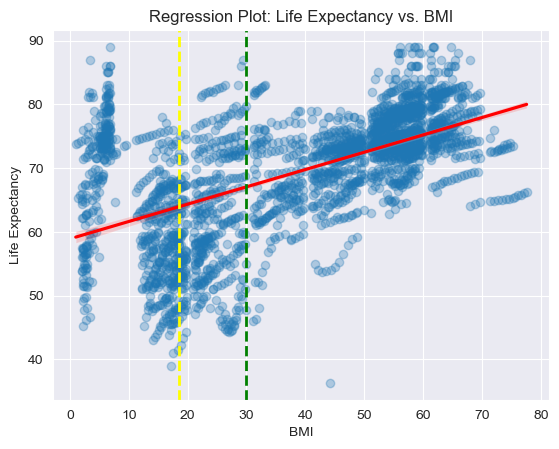

In [14]:
sns.regplot(x='BMI', y='Life expectancy', data=data_frame, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.axvline(x=18.5, color='yellow', linestyle='--', linewidth=2)
plt.axvline(x=30, color='green', linestyle='--', linewidth=2)
plt.title('Regression Plot: Life Expectancy vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.show()

# Priprava testovaci, trenovaci a validaci monziny. Transformace a  doplneni chybejicich hodnot #
Pouziji train_test_split ze scikit-learn 

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
random_seed = 42

Xtrain, Xval, ytrain, yval = train_test_split(data_frame.drop(columns = ['Life expectancy']), data_frame['Life expectancy'], test_size=0.4, random_state=random_seed)
Xval, Xtest, yval, ytest = train_test_split(Xval, yval, test_size=0.3, random_state=random_seed)

print(f"Train rozměry, X: {Xtrain.shape}, y: {ytrain.shape}")
print(f"Val rozměry, X: {Xval.shape}, y: {yval.shape}")
print(f"Test rozměry, X: {Xtest.shape}, y: {ytest.shape}")

Train rozměry, X: (1630, 21), y: (1630,)
Val rozměry, X: (761, 21), y: (761,)
Test rozměry, X: (327, 21), y: (327,)


## Podivame se na chybejici hodnty. ##
Nejrpve se podivame pro x-mnoziny. Pozdeji se podivame i na y-mnoziny pro jistotu.

In [17]:
def showMissing(train,val,test):
    list = []
    list.append(train)
    list.append(val)
    list.append(test)
    for set in list:
        print(set.isnull().sum())
    print("***")


In [18]:
showMissing(Xtrain,Xval,Xtest)

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                             94
percentage expenditure               0
Hepatitis B                        330
Measles                              0
BMI                                 15
under-five deaths                    0
Polio                                9
Total expenditure                  119
Diphtheria                           9
HIV/AIDS                             0
GDP                                250
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15
Income composition of resources     83
Schooling                           83
dtype: int64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant death

In [19]:
print(ytest.isnull().sum())
print(yval.isnull().sum())
print(ytrain.isnull().sum())

0
0
0


Podivame se na priznak BMI, vidime,ze jejich cybejici pocet je velmi nizky, takze NaN hodnoty vyplnim prumerem. Chtel bych ale doplnit BMI podle Status. Jestli jsme v rozvojove zemi, muzeme cekat, ze BMI bude mensi nez v rozvinute zemi.
Nize uvedene "vyplneni Nanu" jsem si trosku upravil a dohledal na Stack Overflow.

In [20]:
avg = data_frame.groupby('Status')['BMI'].mean()
print(avg)

Status
Developed     51.723617
Developing    35.477993
Name: BMI, dtype: float64


In [21]:
avg_train = Xtrain.groupby('Status')['BMI'].mean()
Xtrain['BMI'] = Xtrain.apply(lambda row :avg_train[row['Status']] if pd.isna(row['BMI']) else row['BMI'],axis =1)
avg_val = Xval.groupby('Status')['BMI'].mean()
Xval['BMI'] = Xval.apply(lambda row :avg_val[row['Status']] if pd.isna(row['BMI']) else row['BMI'],axis =1)
avg_test = Xtest.groupby('Status')['BMI'].mean()
Xtest['BMI'] = Xtest.apply(lambda row :avg_test[row['Status']] if pd.isna(row['BMI']) else row['BMI'],axis =1)

showMissing(Xtrain,Xval,Xtest)

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                             94
percentage expenditure               0
Hepatitis B                        330
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                9
Total expenditure                  119
Diphtheria                           9
HIV/AIDS                             0
GDP                                250
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15
Income composition of resources     83
Schooling                           83
dtype: int64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant death

Dale se zamerime na priznak "Alcohol". Vime, ze alkohol je v nekterych zemi zakan ci mene konzumovan kvuli nabozenstvi,zvykum a atd. Pokud pro danou zemi nevime nic ohledne "Alcohol:, tak doplnime 0.

In [22]:
median_alcohol_country = Xtrain.groupby(['Country'])['Alcohol'].transform('median')
Xtrain['Alcohol'].fillna(median_alcohol_country,inplace = True)
Xtrain['Alcohol'] = Xtrain['Alcohol'].fillna(0)
median_alcohol_country = Xval.groupby(['Country'])['Alcohol'].transform('median')
Xval['Alcohol'].fillna(median_alcohol_country,inplace = True)
Xval['Alcohol'] = Xval['Alcohol'].fillna(0)
median_alcohol_country = Xtest.groupby(['Country'])['Alcohol'].transform('median')
Xtest['Alcohol'].fillna(median_alcohol_country,inplace = True)
Xtest['Alcohol'] = Xtest['Alcohol'].fillna(0)

showMissing(Xtrain,Xval,Xtest)

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        330
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                9
Total expenditure                  119
Diphtheria                           9
HIV/AIDS                             0
GDP                                250
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15
Income composition of resources     83
Schooling                           83
dtype: int64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant death

Podivame se na chybejici hodnoty u ockovani na zloutenku, poli viru a zaskrtu. Budu uvazovat, ze ockovani je vice rozsireno v rozvinutych zemich. Doplnim tedy prumereme vytvorenym ze Status.

In [23]:
avg_HB = data_frame.groupby('Status')['Hepatitis B'].mean()
print(avg_HB)

avg_Poli = data_frame.groupby('Status')['Polio'].mean()
print(avg_Poli)

avg_Dip = data_frame.groupby('Status')['Diphtheria'].mean()
print(avg_Dip)

Xtrain['Hepatitis B'] = Xtrain.apply(lambda row :avg_HB[row['Status']] if pd.isna(row['Hepatitis B']) else row['Hepatitis B'],axis =1)
Xval['Hepatitis B'] = Xval.apply(lambda row :avg_HB[row['Status']] if pd.isna(row['Hepatitis B']) else row['Hepatitis B'],axis =1)
Xtest['Hepatitis B'] = Xtest.apply(lambda row :avg_HB[row['Status']] if pd.isna(row['Hepatitis B']) else row['Hepatitis B'],axis =1)

Xtrain['Polio'] = Xtrain.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Polio']) else row['Polio'],axis =1)
Xval['Polio'] = Xval.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Polio']) else row['Polio'],axis =1)
Xtest['Polio'] = Xtest.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Polio']) else row['Polio'],axis =1)

Xtrain['Diphtheria'] = Xtrain.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Diphtheria']) else row['Diphtheria'],axis =1)
Xval['Diphtheria'] = Xval.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Diphtheria']) else row['Diphtheria'],axis =1)
Xtest['Diphtheria'] = Xtest.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Diphtheria']) else row['Diphtheria'],axis =1)

showMissing(Xtrain,Xval,Xtest)

Status
Developed     87.339683
Developing    79.799253
Name: Hepatitis B, dtype: float64
Status
Developed     93.480851
Developing    80.219731
Name: Polio, dtype: float64
Status
Developed     93.227660
Developing    79.798206
Name: Diphtheria, dtype: float64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                  119
Diphtheria                           0
HIV/AIDS                             0
GDP                                250
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15

Doplnime nyni Total expenditure jako prumer pro danou zemi, pokud nenalezneme prumer pro zemi, tak doplnime prumerem pro status.

In [24]:
def fillna_feature(row):
    avg_TE = data_frame.groupby('Country')['Total expenditure'].mean()
    avg_TE_Status = data_frame.groupby('Status')['Total expenditure'].mean()
    country_mean = avg_TE.get(row['Country'])
    status_mean = avg_TE_Status.get(row['Status'])
    if pd.notna(country_mean):
        return country_mean
    elif pd.notna(status_mean):
        return status_mean
    else:
        return row['Total expenditure']


Xtrain['Total expenditure'] = Xtrain.apply(fillna_feature,axis =1)
Xval['Total expenditure'] = Xval.apply(fillna_feature,axis =1)
Xtest['Total expenditure'] = Xtest.apply(fillna_feature,axis =1)

showMissing(Xtrain,Xval,Xtest)

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                250
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15
Income composition of resources     83
Schooling                           83
dtype: int64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant death

Ted pristoupime na GDP.

In [25]:
avg_GDP = data_frame.groupby('Status')['GDP'].mean()
print(avg_GDP)

Xtrain['GDP'] = Xtrain.apply(lambda row :avg_GDP[row['Status']] if pd.isna(row['GDP']) else row['GDP'],axis =1)
Xval['GDP'] = Xval.apply(lambda row :avg_GDP[row['Status']] if pd.isna(row['GDP']) else row['GDP'],axis =1)
Xtest['GDP'] = Xtest.apply(lambda row :avg_GDP[row['Status']] if pd.isna(row['GDP']) else row['GDP'],axis =1)
showMissing(Xtrain,Xval,Xtest)

Status
Developed     22675.139269
Developing     4338.408922
Name: GDP, dtype: float64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                         361
thinness  1-19 years                15
thinness 5-9 years                  15
Income composition of resources     83
Schooling                           83
dtype: int64
Country                              0
Year                                 0
Sta

Ted doplnime  thinness  1-19 years a thinness 5-9 years

In [26]:
avg_ThinSmall = data_frame.groupby('Status')['thinness 5-9 years'].mean()
print(avg_ThinSmall)

Xtrain['thinness 5-9 years'] = Xtrain.apply(lambda row :avg_ThinSmall[row['Status']] if pd.isna(row['thinness 5-9 years']) else row['thinness 5-9 years'],axis =1)
Xval['thinness 5-9 years'] = Xval.apply(lambda row :avg_ThinSmall[row['Status']] if pd.isna(row['thinness 5-9 years']) else row['thinness 5-9 years'],axis =1)
Xtest['thinness 5-9 years'] = Xtest.apply(lambda row :avg_ThinSmall[row['Status']] if pd.isna(row['thinness 5-9 years']) else row['thinness 5-9 years'],axis =1)

avg_ThinBig = data_frame.groupby('Status')['thinness  1-19 years'].mean()
print(avg_ThinBig)

Xtrain['thinness  1-19 years'] = Xtrain.apply(lambda row :avg_ThinBig[row['Status']] if pd.isna(row['thinness  1-19 years']) else row['thinness  1-19 years'],axis =1)
Xval['thinness  1-19 years'] = Xval.apply(lambda row :avg_ThinBig[row['Status']] if pd.isna(row['thinness  1-19 years']) else row['thinness  1-19 years'],axis =1)
Xtest['thinness  1-19 years'] = Xtest.apply(lambda row :avg_ThinBig[row['Status']] if pd.isna(row['thinness  1-19 years']) else row['thinness  1-19 years'],axis =1)
showMissing(Xtrain,Xval,Xtest)

Status
Developed     1.286596
Developing    5.694779
Name: thinness 5-9 years, dtype: float64
Status
Developed     1.309362
Developing    5.650090
Name: thinness  1-19 years, dtype: float64
Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                          0
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                0
Total expenditure                    0
Diphtheria                           0
HIV/AIDS                             0
GDP                                  0
Population                         361
thinness  1-19 years                 0
thinness 5-9 years                   0
Income composition of resources     83
Schooling                     

Zamerime se ted na populaci.

In [27]:
bins_pop = [0,1000000,10000000,float('inf')]
bins_label =['small_pop','middle_pop','big_pop']

Xtrain['Population_cat'] = pd.cut(Xtrain['Population'], bins=bins_pop, labels=bins_label, right=False, include_lowest=True)
Xtrain['Population_cat'] = pd.Categorical(Xtrain['Population_cat'], categories=bins_label + ['DUNNO'])
Xtrain['Population_cat'].fillna('DUNNO', inplace=True)
Xtrain = Xtrain.drop('Population',axis=1)

Xval['Population_cat'] = pd.cut(Xval['Population'], bins=bins_pop, labels=bins_label, right=False, include_lowest=True)
Xval['Population_cat'] = pd.Categorical(Xval['Population_cat'], categories=bins_label + ['DUNNO'])
Xval['Population_cat'].fillna('DUNNO', inplace=True)
Xval = Xval.drop('Population',axis=1)

Xtest['Population_cat'] = pd.cut(Xtest['Population'], bins=bins_pop, labels=bins_label, right=False, include_lowest=True)
Xtest['Population_cat'] = pd.Categorical(Xtest['Population_cat'], categories=bins_label + ['DUNNO'])
Xtest['Population_cat'].fillna('DUNNO', inplace=True)
Xtest = Xtest.drop('Population',axis=1)

showMissing(Xtrain,Xval,Xtest)

Country                             0
Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0
Alcohol                             0
percentage expenditure              0
Hepatitis B                         0
Measles                             0
BMI                                 0
under-five deaths                   0
Polio                               0
Total expenditure                   0
Diphtheria                          0
HIV/AIDS                            0
GDP                                 0
thinness  1-19 years                0
thinness 5-9 years                  0
Income composition of resources    83
Schooling                          83
Population_cat                      0
dtype: int64
Country                             0
Year                                0
Status                              0
Adult Mortality                     0
infant deaths                       0

Dale doplnim v podobne styl Income Resources

In [28]:
bins_res = [0,0.2,0.4,0.6,0.8,1]
bins_label =['small','smallish','middle','bigger','top']

Xtrain['Income_cat'] = pd.cut(Xtrain['Income composition of resources'], bins=bins_res, labels=bins_label, right=False, include_lowest=True)
Xtrain['Income_cat'] = pd.Categorical(Xtrain['Income_cat'], categories=bins_label + ['DUNNO'])
Xtrain['Income_cat'].fillna('DUNNO', inplace=True)
Xtrain = Xtrain.drop('Income composition of resources',axis=1)

Xval['Income_cat'] = pd.cut(Xval['Income composition of resources'], bins=bins_res, labels=bins_label, right=False, include_lowest=True)
Xval['Income_cat'] = pd.Categorical(Xval['Income_cat'], categories=bins_label + ['DUNNO'])
Xval['Income_cat'].fillna('DUNNO', inplace=True)
Xval = Xval.drop('Income composition of resources',axis=1)

Xtest['Income_cat'] = pd.cut(Xtest['Income composition of resources'], bins=bins_res, labels=bins_label, right=False, include_lowest=True)
Xtest['Income_cat'] = pd.Categorical(Xtest['Income_cat'], categories=bins_label + ['DUNNO'])
Xtest['Income_cat'].fillna('DUNNO', inplace=True)
Xtest = Xtest.drop('Income composition of resources',axis=1)

showMissing(Xtrain,Xval,Xtest)

Country                    0
Year                       0
Status                     0
Adult Mortality            0
infant deaths              0
Alcohol                    0
percentage expenditure     0
Hepatitis B                0
Measles                    0
BMI                        0
under-five deaths          0
Polio                      0
Total expenditure          0
Diphtheria                 0
HIV/AIDS                   0
GDP                        0
thinness  1-19 years       0
thinness 5-9 years         0
Schooling                 83
Population_cat             0
Income_cat                 0
dtype: int64
Country                    0
Year                       0
Status                     0
Adult Mortality            0
infant deaths              0
Alcohol                    0
percentage expenditure     0
Hepatitis B                0
Measles                    0
BMI                        0
under-five deaths          0
Polio                      0
Total expenditure          0
D

Nakonec i stejnym zpusobem doplnime Schooling

In [29]:
bins_school = [0,2,5,8,10]
bins_label =['low_ed','small_ed','middle_ed','high_ed']

Xtrain['School_cat'] = pd.cut(Xtrain['Schooling'], bins=bins_school, labels=bins_label, right=False, include_lowest=True)
Xtrain['School_cat'] = pd.Categorical(Xtrain['School_cat'], categories=bins_label + ['DUNNO'])
Xtrain['School_cat'].fillna('DUNNO', inplace=True)
Xtrain = Xtrain.drop('Schooling',axis=1)

Xval['School_cat'] = pd.cut(Xval['Schooling'], bins=bins_school, labels=bins_label, right=False, include_lowest=True)
Xval['School_cat'] = pd.Categorical(Xval['School_cat'], categories=bins_label + ['DUNNO'])
Xval['School_cat'].fillna('DUNNO', inplace=True)
Xval = Xval.drop('Schooling',axis=1)

Xtest['School_cat'] = pd.cut(Xtest['Schooling'], bins=bins_school, labels=bins_label, right=False, include_lowest=True)
Xtest['School_cat'] = pd.Categorical(Xtest['School_cat'], categories=bins_label + ['DUNNO'])
Xtest['School_cat'].fillna('DUNNO', inplace=True)
Xtest = Xtest.drop('Schooling',axis=1)

showMissing(Xtrain,Xval,Xtest)

Country                   0
Year                      0
Status                    0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
thinness  1-19 years      0
thinness 5-9 years        0
Population_cat            0
Income_cat                0
School_cat                0
dtype: int64
Country                   0
Year                      0
Status                    0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AID

# Predzpracovani dat #
!! Uz hned na zacatku jsem se rozhodl prevest priznaky na cislene typy, jsem tak nauceny a je to pro mne prehlednejsi si to udelat hned.
Vsechny neciselne priznaky si budu muset prevest na nejaky cieslny datovy typ. Pro Country pouziji prevod na Category a pomoci cat.codes prevedu na ciselny typ.
U Status muzu binarne prevest jako Developed = 1, Developing = 0.

In [30]:
def showSets(train,val,test):
    list = []
    list.append(train)
    list.append(val)
    list.append(test)
    for set in list:
        print(set.info())
    print("***")

In [31]:
Xtrain['Country'] = Xtrain['Country'].astype('category')
Xtrain['Country'] = Xtrain['Country'].cat.codes

Xval['Country'] = Xval['Country'].astype('category')
Xval['Country'] = Xval['Country'].cat.codes

Xtest['Country'] = Xtest['Country'].astype('category')
Xtest['Country'] = Xtest['Country'].cat.codes

showSets(Xtrain,Xval,Xtest)

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 207 to 860
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 1630 non-null   int16   
 1   Year                    1630 non-null   int64   
 2   Status                  1630 non-null   object  
 3   Adult Mortality         1630 non-null   float64 
 4   infant deaths           1630 non-null   int64   
 5   Alcohol                 1630 non-null   float64 
 6   percentage expenditure  1630 non-null   float64 
 7   Hepatitis B             1630 non-null   float64 
 8   Measles                 1630 non-null   int64   
 9   BMI                     1630 non-null   float64 
 10  under-five deaths       1630 non-null   int64   
 11  Polio                   1630 non-null   float64 
 12  Total expenditure       1630 non-null   float64 
 13  Diphtheria              1630 non-null   float64 
 14  HIV/AIDS                1630

In [32]:
Xtrain = pd.get_dummies(Xtrain,columns=['Status'],prefix='Status',drop_first=False)
Xtrain['Status_Developed'] = Xtrain['Status_Developed'].replace({True: 1, False: 0})
Xtrain['Status_Developing'] = Xtrain['Status_Developing'].replace({True: 1, False: 0})

Xval = pd.get_dummies(Xval,columns=['Status'],prefix='Status',drop_first=False)
Xval['Status_Developed'] = Xval['Status_Developed'].replace({True: 1, False: 0})
Xval['Status_Developing'] = Xval['Status_Developing'].replace({True: 1, False: 0})

Xtest = pd.get_dummies(Xtest,columns=['Status'],prefix='Status',drop_first=False)
Xtest['Status_Developed'] = Xtest['Status_Developed'].replace({True: 1, False: 0})
Xtest['Status_Developing'] = Xtest['Status_Developing'].replace({True: 1, False: 0})

showSets(Xtrain,Xval,Xtest)

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 207 to 860
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 1630 non-null   int16   
 1   Year                    1630 non-null   int64   
 2   Adult Mortality         1630 non-null   float64 
 3   infant deaths           1630 non-null   int64   
 4   Alcohol                 1630 non-null   float64 
 5   percentage expenditure  1630 non-null   float64 
 6   Hepatitis B             1630 non-null   float64 
 7   Measles                 1630 non-null   int64   
 8   BMI                     1630 non-null   float64 
 9   under-five deaths       1630 non-null   int64   
 10  Polio                   1630 non-null   float64 
 11  Total expenditure       1630 non-null   float64 
 12  Diphtheria              1630 non-null   float64 
 13  HIV/AIDS                1630 non-null   float64 
 14  GDP                     1630

Jeste nam zbyva prevest nase nove vytvorene priznaky typu category na ciselne typu. Pouzijeme cat,codes.


In [33]:
Xtrain['Population_cat'] = Xtrain['Population_cat'].astype('category')
Xtrain['Population_cat'] = Xtrain['Population_cat'].cat.codes

Xval['Population_cat'] = Xval['Population_cat'].astype('category')
Xval['Population_cat'] = Xval['Population_cat'].cat.codes

Xtest['Population_cat'] = Xtest['Population_cat'].astype('category')
Xtest['Population_cat'] = Xtest['Population_cat'].cat.codes

Xtrain['Income_cat'] = Xtrain['Income_cat'].astype('category')
Xtrain['Income_cat'] = Xtrain['Income_cat'].cat.codes

Xval['Income_cat'] = Xval['Income_cat'].astype('category')
Xval['Income_cat'] = Xval['Income_cat'].cat.codes

Xtest['Income_cat'] = Xtest['Income_cat'].astype('category')
Xtest['Income_cat'] = Xtest['Income_cat'].cat.codes

Xtrain['School_cat'] = Xtrain['School_cat'].astype('category')
Xtrain['School_cat'] = Xtrain['School_cat'].cat.codes

Xval['School_cat'] = Xval['School_cat'].astype('category')
Xval['School_cat'] = Xval['School_cat'].cat.codes

Xtest['School_cat'] = Xtest['School_cat'].astype('category')
Xtest['School_cat'] = Xtest['School_cat'].cat.codes

showSets(Xtrain,Xval,Xtest)

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 207 to 860
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1630 non-null   int16  
 1   Year                    1630 non-null   int64  
 2   Adult Mortality         1630 non-null   float64
 3   infant deaths           1630 non-null   int64  
 4   Alcohol                 1630 non-null   float64
 5   percentage expenditure  1630 non-null   float64
 6   Hepatitis B             1630 non-null   float64
 7   Measles                 1630 non-null   int64  
 8   BMI                     1630 non-null   float64
 9   under-five deaths       1630 non-null   int64  
 10  Polio                   1630 non-null   float64
 11  Total expenditure       1630 non-null   float64
 12  Diphtheria              1630 non-null   float64
 13  HIV/AIDS                1630 non-null   float64
 14  GDP                     1630 non-null   floa

Nyni prevedeme vsechny priznaku typu float na datovy typ int.
(Uprava -- nakonec tuto promenu nebudu vykonavat.
Ponechavam, kdybych se nakonec rozhodl tuto promenu pozuit.)

In [34]:
#for column in data_frame.columns:
#    if data_frame[column].dtype == 'float64':
#        data_frame[column] = data_frame[column].astype(int)

Nyni mame vsechny priznaky zapsane jako cisleny datovy typ.

Naposled se podivame jak nase data vypadaji, nez je zacneme pouzivat.

In [35]:
def showHead(train,val,test):
    list = []
    list.append(train)
    list.append(val)
    list.append(test)
    for set in list:
        print(set.info())
    print("***")

In [36]:
showHead(Xtrain,Xval,Xtest)

<class 'pandas.core.frame.DataFrame'>
Index: 1630 entries, 207 to 860
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 1630 non-null   int16  
 1   Year                    1630 non-null   int64  
 2   Adult Mortality         1630 non-null   float64
 3   infant deaths           1630 non-null   int64  
 4   Alcohol                 1630 non-null   float64
 5   percentage expenditure  1630 non-null   float64
 6   Hepatitis B             1630 non-null   float64
 7   Measles                 1630 non-null   int64  
 8   BMI                     1630 non-null   float64
 9   under-five deaths       1630 non-null   int64  
 10  Polio                   1630 non-null   float64
 11  Total expenditure       1630 non-null   float64
 12  Diphtheria              1630 non-null   float64
 13  HIV/AIDS                1630 non-null   float64
 14  GDP                     1630 non-null   floa

# Priprava a testovani #
Nejprve si implementujeme nasi konstru. Kostru jsem vyplnil tak, jak jsme si ukazovali na cviceni na par prikladech, zaroven jsem vyuzil stack overflow, ale celkove jsem to ponechal na nizsi urovni, protoze jsem se bal, ze vytvorim neco nepouzitelneho a pomaleho.

In [37]:
# Váš kód zde
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

########################################################
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    dtr_list = []
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth ,**kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        
        pass
    def addToDtr(self,tree):
        self.dtr_list.append(tree)
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        
        for _ in range(self.n_estimators):
            if self.max_samples != None:
                parts = np.random.choice(len(X),size=self.max_samples,replace=True)
                sub_parts = parts[:self.max_samples]
                X_part,y_part = X.iloc[sub_parts],y.iloc[sub_parts]
            else:
                X_part,y_part = X,y
                
            dtr = DecisionTreeRegressor(max_depth=self.max_depth)
            dtr.fit(X_part,y_part)
            
            self.addToDtr(dtr)
        pass
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0],))
        for dtr in self.dtr_list:
            ypredicted += dtr.predict(X)
       
        y_predict = ypredicted / len(self.dtr_list)
        return y_predict


Po implementaci tridy, si ji vyzkousime a vyvodime zavery, ze kterych budeme moci vyvodit nejake vyslekdy

In [38]:
param_values = {
    'n_estimators': [4,8,12],
    'max_samples': [None, 8, 6],
    'max_depth': [None,2,5,8, 10, 20],
}

In [39]:
from itertools import product
import warnings

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [40]:
param_combinations = [comb for comb in product(*param_values.values())]
best_parameters_RANDOM_FOREST_REG = None
best_rmse = float('inf')
warnings.filterwarnings('ignore')

In [41]:
for params in param_combinations:
    
    random_forest_regressor = CustomRandomForest(
        n_estimators=params[0],
        max_samples=params[1],
        max_depth=params[2],
    )
    random_forest_regressor.fit(Xtrain,ytrain)
    
    yval_predict = random_forest_regressor.predict(Xval)
    rmse_valid = np.sqrt(mean_squared_error(yval, yval_predict,squared=False))
    mse_valid =  mean_absolute_error(yval, yval_predict)
    
    if best_rmse > rmse_valid:
        best_rmse = rmse_valid
        best_parameters_RANDOM_FOREST_REG = params
    
random_forest_regressor_best = CustomRandomForest(best_parameters_RANDOM_FOREST_REG[0],best_parameters_RANDOM_FOREST_REG[1],best_parameters_RANDOM_FOREST_REG[2])
random_forest_regressor_best.fit(Xtrain,ytrain)

yval_predict = random_forest_regressor_best.predict(Xval)
rmse_valid = np.sqrt(mean_squared_error(yval, yval_predict,squared=False))
mse_valid =  mean_absolute_error(yval, yval_predict)

ytest_predict = random_forest_regressor_best.predict(Xtest)
rmse_test = np.sqrt(mean_squared_error(ytest, ytest_predict,squared=False))
mse_test =  mean_absolute_error(ytest, ytest_predict)

print("Results on the test set:")
print(f"RMSE on test set: {rmse_test}")
print(f"MAE on test set: {mse_test}")

print("Results on the valid set:")
print(f"RMSE on validation set: {rmse_valid}")
print(f"MAE on validation set: {mse_valid}")

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.fit_transform(Xtest)
Xval_scaled = scaler.fit_transform(Xval)

## Ted si to udelam s normalizovanymi daty
random_forest_regressor_best.fit(Xtrain_scaled,ytrain)

yval_predict = random_forest_regressor_best.predict(Xval_scaled)
rmse_valid = np.sqrt(mean_squared_error(yval, yval_predict,squared=False))
mse_valid =  mean_absolute_error(yval, yval_predict)

ytest_predict = random_forest_regressor_best.predict(Xtest_scaled)
rmse_test = np.sqrt(mean_squared_error(ytest, ytest_predict,squared=False))
mse_test =  mean_absolute_error(ytest, ytest_predict)

print("Results on the normalized test set:")
print(f"RMSE on test set: {rmse_test}")
print(f"MAE on test set: {mse_test}")

print("Results on the normalized validation set:")
print(f"RMSE on validation set: {rmse_valid}")
print(f"MAE on validation set: {mse_valid}")


Results on the test set:
RMSE on test set: 2.045500858181747
MAE on test set: 3.05256218084921
Results on the valid set:
RMSE on validation set: 2.1188873868215845
MAE on validation set: 3.2951855171441724
Results on the normalized test set:
RMSE on test set: 2.957016790359332
MAE on test set: 7.242303811782274
Results on the normalized validation set:
RMSE on validation set: 2.970532673005716
MAE on validation set: 7.188634621095675


Dostavame RMSE validaci 2.122 a testovaci 2.04105. Zatim mi to pripada dobre.
RandomForestRegression je vhodny, kdzy mame nejake odlehlejsi hodnoty a lepe zachyti nelinearni vzathy. Z toho vyvozuji, ze model pro Linearni Regresi by nam mel ukazat jak jsou moc vztahy linearni, proto si to otestuji.

# Linearni Regrese #

Proc Linearni Regrese (dale LR). Je dobra jako vychozi model pro moho uloh. Pouziva se zejmena pri vyskytu linearnich vztahu jednotlivych priznaku a predikovaneho cile. Zacal jsem s LR, protoze je lehka na implementaci a na cviceni jsme si ji hodne venovali.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV


In [43]:
scaling_data = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}
parameter_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 5],
    'positive': [True, False],
}
rmse_best = float('inf')
best_scaler = None
best_parameters_LINEAR_REGRES = None
best_model = None

Results on the valid set:
RMSE on validation set: 2.1162498121314335
MAE on validation set: 3.3771796392300617
Results on the test set:
RMSE on test set: 2.0221417966090027
MAE on test set: 3.0477251990586223


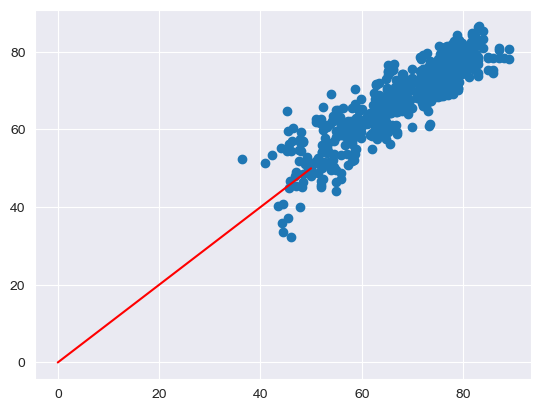

In [44]:
for scaler_name, scaler in scaling_data.items():  
    Xtrain_scale = scaler.fit_transform(Xtrain)
    Xtest_scale = scaler.fit_transform(Xtest)
    Xval_scale = scaler.fit_transform(Xval)

    search_grid = GridSearchCV(LinearRegression(),parameter_grid,scoring='neg_mean_squared_error',cv=10)
    search_grid.fit(Xtrain_scale,ytrain)
    
    best_model = search_grid.best_estimator_
    best_parameters_LINEAR_REGRES = search_grid.best_params_
    
    yval_predicton = best_model.predict(Xval_scale)   
    rmse_valid = np.sqrt(mean_squared_error(yval,yval_predicton,squared = False))
    mae_valid = mean_absolute_error(yval, yval_predicton)
    
    if rmse_valid < rmse_best:
        rmse_best = rmse_valid
        best_scaler = scaler
        best_model = best_model
     
 
X_train_scaled = best_scaler.fit_transform(Xtrain)
X_test_scaled = best_scaler.transform(Xtest)
X_val_scaled = best_scaler.fit_transform(Xval)


ytest_pred = best_model.predict(X_test_scaled)
rmse_test = np.sqrt(mean_squared_error(ytest, ytest_pred,squared = False))
mae_test = mean_absolute_error(ytest, ytest_pred)

yval_predicton = best_model.predict(X_val_scaled)
rmse_valid = np.sqrt(mean_squared_error(yval, yval_predicton,squared = False))
mae_valid = mean_absolute_error(yval, yval_predicton)

print("Results on the valid set:")
print(f"RMSE on validation set: {rmse_valid}")
print(f"MAE on validation set: {mae_valid}")

print("Results on the test set:")
print(f"RMSE on test set: {rmse_test}")
print(f"MAE on test set: {mae_test}")

plt.scatter(yval,yval_predicton)
plt.plot([0,50], [0,50], 'r')
plt.show()

Podobne provedu jeste jednou ale bez normalizace dat

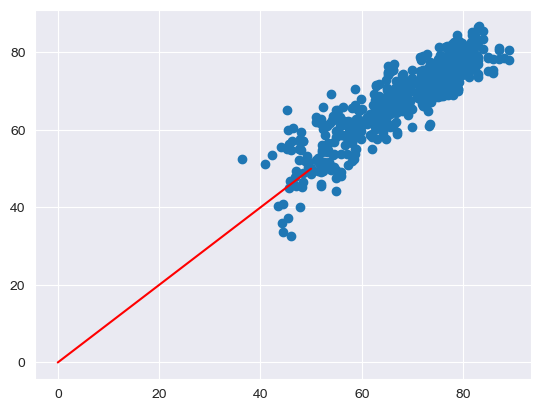

Results on the test set:
RMSE on test set: 2.022141796608997
MAE on test set: 3.0477251990586067
Results on the valid set:
RMSE on test set: 2.1127835265270507
MAE on test set: 3.343307823547868


In [45]:
parameter_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 5],
    'positive': [True, False],
}
search_grid = GridSearchCV(LinearRegression(),parameter_grid,scoring='neg_mean_squared_error',cv=10)
search_grid.fit(Xtrain,ytrain)

best_model_LR = search_grid.best_estimator_
best_params = search_grid.best_params_

yval_predicton = best_model_LR.predict(Xval)
rmse_valid = np.sqrt(mean_squared_error(yval, yval_predicton,squared = False))
mae_valid = mean_absolute_error(yval, yval_predicton)

ytest_pred = best_model_LR.predict(Xtest)
rmse_test = np.sqrt(mean_squared_error(ytest, ytest_pred,squared = False))
mae_test = mean_absolute_error(ytest, ytest_pred)

plt.scatter(yval,yval_predicton)
plt.plot([0,50], [0,50], 'r')
plt.show()

print("Results on the test set:")
print(f"RMSE on test set: {rmse_test}")
print(f"MAE on test set: {mae_test}")

print("Results on the valid set:")
print(f"RMSE on test set: {rmse_valid}")
print(f"MAE on test set: {mae_valid}")


Co si ted z toho vzit ? Vidim, ze normalizce dat nam v tomto modelu Linearni regrese neprinesla zadne hodnoty. RMSE a MSE je mensi v nasem pripade pro nenormalizaci dat. RMSE vladiacni nam vyslo lepsi nez u meho Random Forest Regresion, ale pouze jen o necele 2 setiny.

# Hrebenova Regrese #
!!! Provedl jsem LINEARNI I HREBENOVOU. Proc ? Zajimalo me, jak to dopadne, hlavne jsem se bal, ze ma implementace nebude 100% a chtel jsem timto "double chekcnout", jak vysledky vypadaji.
Podivame se nejdrive na vysledky Hrebenove Regrese bez ladeni hyper parametru.

In [46]:
from sklearn.linear_model import Ridge
from scipy import optimize

Validation RMSE: 4.463757593805609
Test RMSE: 4.089035076333405


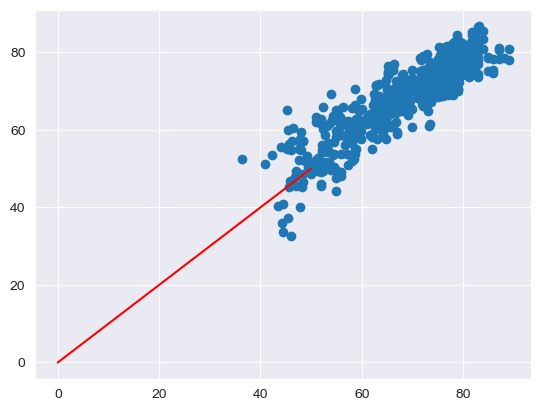

In [47]:
clf_ridge = Ridge(1)
clf_ridge.fit(Xtrain,ytrain)


RMSE_val_ridge = mean_squared_error(yval, clf_ridge.predict(Xval),squared = False)
print(f'Validation RMSE: {RMSE_val_ridge:}')

RMSE_test_ridge = mean_squared_error(ytest, clf_ridge.predict(Xtest),squared = False)
print(f'Test RMSE: {RMSE_test_ridge:}')

plt.scatter(yval, clf_ridge.predict(Xval))
plt.plot([0,50], [0,50], 'r')
plt.show()

Prejdeme na ladeni parametru, v teto casti jsem se hlavne inspiroval ukazkou ze cviceni.

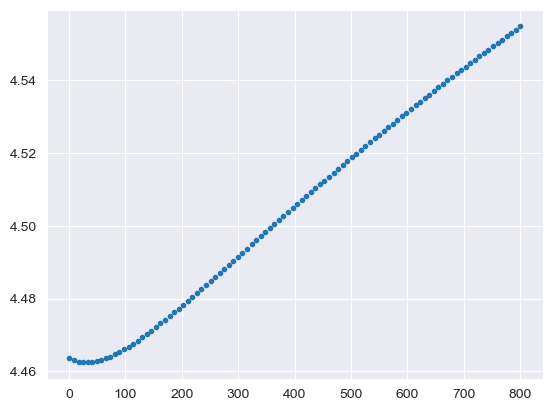

 message: Solution found.
 success: True
  status: 0
     fun: 4.462459228052347
       x: 31.38578787556825
     nit: 15
    nfev: 15


Validační RMSE: 4.46246
Validační MSE: 3.34106
Testovací RMSE: 4.08958
Testovací MSE: 3.04279


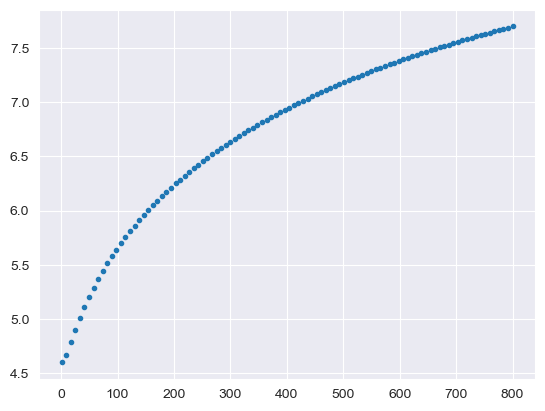

 message: Solution found.
 success: True
  status: 0
     fun: 4.599926656895536
       x: 1.3968997419785822
     nit: 15
    nfev: 15


Validační RMSE normalizace: 4.46246
Validační MSE normalizace: 3.48418
Testovací RMSE normalizace: 4.08958
Testovací MSE normalizace: 3.18479


In [48]:
def get_opt_model(Xtrain,Xval,normalize):
    if normalize == 1:
        Xtrain_def = scaler.fit_transform(Xtrain)
        Xval_def = scaler.fit_transform(Xval)
    else:
        Xtrain_def = Xtrain
        Xval_def = Xval
        
    def rid_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain_def,ytrain)
        return mean_squared_error(yval, clf.predict(Xval_def),squared = False)
    
    alphas = np.linspace(1,800,100)
    alphas_res = [rid_eval(alpha) for alpha in alphas]
    plt.plot(alphas,alphas_res,'.')
    plt.show()
    
    opt_alpha = optimize.minimize_scalar(rid_eval,options={'maxiter':30},method='bounded',bounds=(0.1,100))
    print(opt_alpha)
    print("\n")
    
    clf_opt = Ridge(alpha = opt_alpha.x)
    clf_opt.fit(Xtrain_def,ytrain)
    return  clf_opt

clf_opt_rid = get_opt_model(Xtrain,Xval,0)

RMSE_val_opt_ridge = mean_squared_error(yval,clf_opt_rid.predict(Xval),squared = False)
MAE_val_opt_ridge = mean_absolute_error(yval,clf_opt_rid.predict(Xval))
print(f'Validační RMSE: {RMSE_val_opt_ridge:.5f}')
print(f'Validační MSE: {MAE_val_opt_ridge:.5f}')

RMSE_test_opt_ridge = mean_squared_error(ytest, clf_opt_rid.predict(Xtest),squared = False)
MSE_test_opt_ridge = mean_absolute_error(ytest, clf_opt_rid.predict(Xtest))
print(f'Testovací RMSE: {RMSE_test_opt_ridge:.5f}')
print(f'Testovací MSE: {MSE_test_opt_ridge:.5f}')


clf_opt_rid = get_opt_model(Xtrain,Xval,1)

MSE_val_opt_ridge = mean_squared_error(yval,clf_opt_rid.predict(scaler.fit_transform(Xval)),squared = False)
MSE_val_opt_ridge = mean_absolute_error(yval,clf_opt_rid.predict(scaler.fit_transform(Xval)))
print(f'Validační RMSE normalizace: {RMSE_val_opt_ridge:.5f}')
print(f'Validační MSE normalizace: {MSE_val_opt_ridge:.5f}')

MSE_test_opt_ridge = mean_squared_error(ytest, clf_opt_rid.predict(scaler.fit_transform(Xtest)),squared = False)
MSE_test_opt_ridge = mean_absolute_error(ytest, clf_opt_rid.predict(scaler.fit_transform(Xtest)))
print(f'Testovací RMSE normalizace: {RMSE_test_opt_ridge:.5f}')
print(f'Testovací MSE normalizace: {MSE_test_opt_ridge:.5f}')



Vysledky pro Hrebenovou Regresi mi nevysly moc dobre. Prikladam to k tomu, ze tato metoda je citliva na "sum" v datech, ktere jsou ve velke mire doplnoval. Zaroven je u teto metody dulezita volba alpha parametru, se kterou se musi "pohrat", aby se dosahlo dobrych vysledku.

# KNN Regressor #
KNN metoda je velmi prijemna a jednoducha na implementaci. Zaroven je velmi schopna zachytit nelinearni vztahy.


In [49]:
from sklearn.neighbors import KNeighborsRegressor

In [50]:
parameter_grid_knn = {
    'n_neighbors': [3,5,20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [51]:
knn_reg = KNeighborsRegressor()
grid_Search = GridSearchCV(knn_reg,parameter_grid_knn,scoring='neg_mean_squared_error', cv=5)
grid_Search.fit(Xtrain,ytrain)
best_parameters_LINEAR_REGRES = grid_Search.best_params_
best_knn_reg = grid_Search.best_estimator_
yval_pred = best_knn_reg.predict(Xval)
ytest_pred = best_knn_reg.predict(Xtest)

rmse_val = np.sqrt(mean_squared_error(yval, yval_pred,squared=False))
mae_val = mean_absolute_error(yval,yval_predicton)
rmse_test = np.sqrt(mean_squared_error(ytest, ytest_pred,squared=False))
mae_test = mean_absolute_error(ytest,ytest_predict)
print(f"RMSE on validation set: {rmse_val}")
print(f"MAE on validation set: {mae_val}")
print(f"RMSE on validation set: {rmse_val}")
print(f"MAE on validation set: {mae_val}")


RMSE on validation set: 2.34761670908486
MAE on validation set: 3.343307823547868
RMSE on validation set: 2.34761670908486
MAE on validation set: 3.343307823547868


Vidime, ze vysledky nejsou tak spatne, ale RMSE jsou mensi nez u Linearni Regrese. 

# Finalni model a vyhodnoceni vysledku #
Pro finalni model volim Linearni Regresi a to bez normlizaci dat, RMSE mi vyslo shodne pro normalizaci a nenormalizaci. Tato metoda by nemela by byt citliva na skalu dat. Ocekavam RMSE hondotu okolo 2.2

In [52]:
eval = pd.read_csv('evaluation.csv')
eval.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Azerbaijan,2015,Developing,118.0,5,NaN,0.000000,96.0,0,52.5,...,98.0,NaN,96.0,0.1,55.313820,9649341.0,2.8,2.9,0.758,12.7
1,Azerbaijan,2014,Developing,119.0,5,0.01,306.182431,94.0,0,51.5,...,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
2,Azerbaijan,2013,Developing,121.0,5,2.14,275.651493,93.0,164,5.6,...,96.0,5.54,93.0,0.1,7875.756953,941681.0,2.8,2.8,0.745,11.9
3,Azerbaijan,2012,Developing,123.0,5,0.01,285.610391,88.0,0,49.7,...,92.0,5.37,89.0,0.1,7496.335728,9295784.0,2.8,2.8,0.742,11.8
4,Azerbaijan,2011,Developing,125.0,5,1.98,263.142699,84.0,0,48.8,...,91.0,5.10,87.0,0.1,7189.691229,917382.0,2.8,2.9,0.741,11.7


In [53]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          171 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      187 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              204 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            209 non-null    float64
 12  Total expenditure     

Doplnim chybejici hodnoty tak, jak jsem to delal i u "data.csv"

In [54]:
avg = eval.groupby('Status')['BMI'].mean()
eval['BMI'] = eval.apply(lambda row :avg[row['Status']] if pd.isna(row['BMI']) else row['BMI'],axis =1)


In [55]:
median_alcohol_country = eval.groupby(['Country'])['Alcohol'].transform('median')
eval['Alcohol'].fillna(median_alcohol_country,inplace = True)
eval['Alcohol'] = eval['Alcohol'].fillna(0)

In [56]:
avg_HB = eval.groupby('Status')['Hepatitis B'].mean()
avg_Poli = eval.groupby('Status')['Polio'].mean()
avg_Dip = eval.groupby('Status')['Diphtheria'].mean()
eval['Hepatitis B'] = eval.apply(lambda row :avg_HB[row['Status']] if pd.isna(row['Hepatitis B']) else row['Hepatitis B'],axis =1)
eval['Polio'] = eval.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Polio']) else row['Polio'],axis =1)
eval['Diphtheria'] = eval.apply(lambda row :avg_Poli[row['Status']] if pd.isna(row['Diphtheria']) else row['Diphtheria'],axis =1)

In [57]:
def fillna_feature(row):
    avg_TE = eval.groupby('Country')['Total expenditure'].mean()
    avg_TE_Status = eval.groupby('Status')['Total expenditure'].mean()
    country_mean = avg_TE.get(row['Country'])
    status_mean = avg_TE_Status.get(row['Status'])
    if pd.notna(country_mean):
        return country_mean
    elif pd.notna(status_mean):
        return status_mean
    else:
        return row['Total expenditure']


eval['Total expenditure'] = eval.apply(fillna_feature,axis =1)

In [58]:
avg_GDP = eval.groupby('Status')['GDP'].mean()
eval['GDP'] = eval.apply(lambda row :avg_GDP[row['Status']] if pd.isna(row['GDP']) else row['GDP'],axis =1)

In [59]:
avg_ThinSmall = eval.groupby('Status')['thinness 5-9 years'].mean()
eval['thinness 5-9 years'] = eval.apply(lambda row :avg_ThinSmall[row['Status']] if pd.isna(row['thinness 5-9 years']) else row['thinness 5-9 years'],axis =1)

avg_ThinBig = eval.groupby('Status')['thinness  1-19 years'].mean()
eval['thinness  1-19 years'] = eval.apply(lambda row :avg_ThinBig[row['Status']] if pd.isna(row['thinness  1-19 years']) else row['thinness  1-19 years'],axis =1)

In [60]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          210 non-null    object 
 1   Year                             210 non-null    int64  
 2   Status                           210 non-null    object 
 3   Adult Mortality                  210 non-null    float64
 4   infant deaths                    210 non-null    int64  
 5   Alcohol                          210 non-null    float64
 6   percentage expenditure           210 non-null    float64
 7   Hepatitis B                      210 non-null    float64
 8   Measles                          210 non-null    int64  
 9   BMI                              210 non-null    float64
 10  under-five deaths                210 non-null    int64  
 11  Polio                            210 non-null    float64
 12  Total expenditure     

In [61]:
bins_pop = [0,1000000,10000000,float('inf')]
bins_label =['small_pop','middle_pop','big_pop']

eval['Population_cat'] = pd.cut(eval['Population'], bins=bins_pop, labels=bins_label, right=False, include_lowest=True)
eval['Population_cat'] = pd.Categorical(eval['Population_cat'], categories=bins_label + ['DUNNO'])
eval['Population_cat'].fillna('DUNNO', inplace=True)
eval = eval.drop('Population',axis=1)


In [62]:
bins_res = [0,0.2,0.4,0.6,0.8,1]
bins_label =['small','smallish','middle','bigger','top']

eval['Income_cat'] = pd.cut(eval['Income composition of resources'], bins=bins_res, labels=bins_label, right=False, include_lowest=True)
eval['Income_cat'] = pd.Categorical(eval['Income_cat'], categories=bins_label + ['DUNNO'])
eval['Income_cat'].fillna('DUNNO', inplace=True)
eval = eval.drop('Income composition of resources',axis=1)

In [63]:
bins_school = [0,2,5,8,10]
bins_label =['low_ed','small_ed','middle_ed','high_ed']

eval['School_cat'] = pd.cut(eval['Schooling'], bins=bins_school, labels=bins_label, right=False, include_lowest=True)
eval['School_cat'] = pd.Categorical(eval['School_cat'], categories=bins_label + ['DUNNO'])
eval['School_cat'].fillna('DUNNO', inplace=True)
eval = eval.drop('Schooling',axis=1)


In [64]:
country_list = eval['Country']
eval['Country'] = eval['Country'].astype('category')
eval['Country'] = eval['Country'].cat.codes

In [65]:
eval = pd.get_dummies(eval,columns=['Status'],prefix='Status',drop_first=False)
eval['Status_Developed'] = eval['Status_Developed'].replace({True: 1, False: 0})
eval['Status_Developing'] = eval['Status_Developing'].replace({True: 1, False: 0})

In [66]:
eval['Population_cat'] = eval['Population_cat'].astype('category')
eval['Population_cat'] = eval['Population_cat'].cat.codes

In [67]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 210 non-null    int8    
 1   Year                    210 non-null    int64   
 2   Adult Mortality         210 non-null    float64 
 3   infant deaths           210 non-null    int64   
 4   Alcohol                 210 non-null    float64 
 5   percentage expenditure  210 non-null    float64 
 6   Hepatitis B             210 non-null    float64 
 7   Measles                 210 non-null    int64   
 8   BMI                     210 non-null    float64 
 9   under-five deaths       210 non-null    int64   
 10  Polio                   210 non-null    float64 
 11  Total expenditure       210 non-null    float64 
 12  Diphtheria              210 non-null    float64 
 13  HIV/AIDS                210 non-null    float64 
 14  GDP                     21

In [68]:
eval['Income_cat'] = eval['Income_cat'].astype('category')
eval['Income_cat'] = eval['Income_cat'].cat.codes

In [69]:
eval['School_cat'] = eval['School_cat'].astype('category')
eval['School_cat'] = eval['School_cat'].cat.codes

In [70]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 210 non-null    int8   
 1   Year                    210 non-null    int64  
 2   Adult Mortality         210 non-null    float64
 3   infant deaths           210 non-null    int64  
 4   Alcohol                 210 non-null    float64
 5   percentage expenditure  210 non-null    float64
 6   Hepatitis B             210 non-null    float64
 7   Measles                 210 non-null    int64  
 8   BMI                     210 non-null    float64
 9   under-five deaths       210 non-null    int64  
 10  Polio                   210 non-null    float64
 11  Total expenditure       210 non-null    float64
 12  Diphtheria              210 non-null    float64
 13  HIV/AIDS                210 non-null    float64
 14  GDP                     210 non-null    fl

In [71]:
predictions = best_model_LR.predict(eval)
predictions = [round(value,1) for value in predictions]

In [72]:
year = eval['Year'].tolist()
results = pd.DataFrame({'Country' : country_list, 'Year' : year, 'Life expectancy': predictions})
results

,Country,Year,Life expectancy
0,Azerbaijan,2015,73.1
1,Azerbaijan,2014,73.2
2,Azerbaijan,2013,70.6
3,Azerbaijan,2012,72.5
4,Azerbaijan,2011,72.6
...,...,...,...
205,United Republic of Tanzania,2014,72.6
206,United Republic of Tanzania,2013,65.7
207,United Republic of Tanzania,2012,62.1
208,United Republic of Tanzania,2011,61.9


In [73]:
results.to_csv('results.csv',index=False)